In [1]:
import numpy as np
# Importing standard Qiskit libraries
import qiskit
import ibm_quantum_widgets
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.providers.ibmq.managed import ManagedJobSet
from qiskit import *
from qiskit.quantum_info import *
from qiskit.compiler import transpile, assemble    
# Loading your IBM Quantum account(s)
IBMQ.save_account('75da116329ce92433692cf629339aa3dfb074724721911d7593fb20cf698e293b319b74de3cc617e922c29196c47c243def67a149e7a1bbbbded9c5e51cf072e')
provider = IBMQ.load_account()
IBMQ.get_provider(hub='ibm-q', group='open')
# Get your backend
backend = provider.get_backend('ibmq_armonk')
backend.status()

configrc.store_credentials:WARNING:2022-03-14 15:47:01,744: Credentials already present. Set overwrite=True to overwrite.
C:\Users\pavel\anaconda3\envs\qisk\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [4]:
jobs = backend.jobs(limit = 36)

In [37]:
names = {}
for i in range(36):
    tmp_str = jobs[i]._name
    tmp_str = tmp_str[17:]
    tmp_str = tmp_str.replace("_",'')
    names[i] = int(tmp_str)

In [43]:
print(names)

{0: 20, 1: 19, 2: 18, 3: 17, 4: 16, 5: 15, 6: 14, 7: 13, 8: 27, 9: 11, 10: 10, 11: 24, 12: 23, 13: 22, 14: 21, 15: 35, 16: 34, 17: 33, 18: 32, 19: 31, 20: 30, 21: 29, 22: 28, 23: 12, 24: 26, 25: 25, 26: 9, 27: 8, 28: 7, 29: 6, 30: 5, 31: 4, 32: 3, 33: 2, 34: 1, 35: 0}


In [66]:
table_result = []
for i in range(36):
    for j in range(36):
        tmp_list = []
        if names[j] == i:
            results = jobs[j].result().get_counts()
            for k in range(100):
                tmp_list.append(int(results[k]['0']))
            table_result.append(tmp_list)
            break
print(table_result)

[[17795, 18523, 18570, 18563, 18572, 18523, 18515, 18488, 18486, 18448, 18465, 18438, 18429, 18386, 18402, 18243, 18307, 18207, 18224, 18138, 18092, 18120, 17961, 17926, 17962, 17838, 17778, 17768, 17678, 17597, 17548, 17501, 17383, 17298, 17310, 17197, 17157, 17010, 16977, 16832, 16804, 16872, 16654, 16642, 16447, 16394, 16417, 16221, 16196, 16048, 15981, 15832, 15759, 15736, 15645, 15571, 15512, 15366, 15349, 15173, 15053, 14932, 14834, 14781, 14746, 14635, 14524, 14332, 14294, 14184, 14001, 13977, 13939, 13861, 13704, 13653, 13520, 13366, 13295, 13282, 13200, 12948, 12815, 12939, 12717, 12599, 12660, 12407, 12523, 12301, 12242, 12181, 12205, 11939, 12000, 11928, 11824, 11578, 11696, 11596], [10300, 10238, 10291, 10121, 9986, 10057, 9820, 9770, 9713, 9515, 9586, 9500, 9486, 9438, 9344, 9182, 9331, 8961, 9015, 9047, 8954, 8965, 8828, 8765, 8794, 8774, 8733, 8744, 8472, 8569, 8484, 8361, 8481, 8447, 8327, 8621, 8264, 8328, 8352, 8221, 8322, 8239, 8006, 8208, 8150, 8148, 8198, 8086, 819

In [67]:
tmp_table = []
for i in range(18):
    tmp_table.append(table_result[2 * i] + table_result[2*i + 1])
print(tmp_table)
table_result = tmp_table

[[17795, 18523, 18570, 18563, 18572, 18523, 18515, 18488, 18486, 18448, 18465, 18438, 18429, 18386, 18402, 18243, 18307, 18207, 18224, 18138, 18092, 18120, 17961, 17926, 17962, 17838, 17778, 17768, 17678, 17597, 17548, 17501, 17383, 17298, 17310, 17197, 17157, 17010, 16977, 16832, 16804, 16872, 16654, 16642, 16447, 16394, 16417, 16221, 16196, 16048, 15981, 15832, 15759, 15736, 15645, 15571, 15512, 15366, 15349, 15173, 15053, 14932, 14834, 14781, 14746, 14635, 14524, 14332, 14294, 14184, 14001, 13977, 13939, 13861, 13704, 13653, 13520, 13366, 13295, 13282, 13200, 12948, 12815, 12939, 12717, 12599, 12660, 12407, 12523, 12301, 12242, 12181, 12205, 11939, 12000, 11928, 11824, 11578, 11696, 11596, 10300, 10238, 10291, 10121, 9986, 10057, 9820, 9770, 9713, 9515, 9586, 9500, 9486, 9438, 9344, 9182, 9331, 8961, 9015, 9047, 8954, 8965, 8828, 8765, 8794, 8774, 8733, 8744, 8472, 8569, 8484, 8361, 8481, 8447, 8327, 8621, 8264, 8328, 8352, 8221, 8322, 8239, 8006, 8208, 8150, 8148, 8198, 8086, 8198,

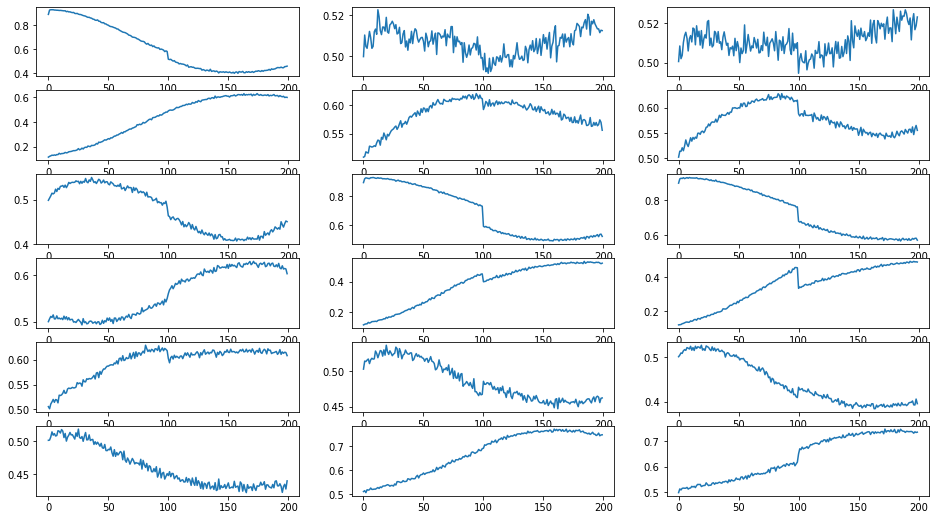

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 9))
tablet = np.array(table_result)
tablet = tablet / 20000
for i in range(18):
    plt.subplot(6, 3, i + 1)
    plt.plot(np.linspace(0, 199, 200), tablet[i][0:200])

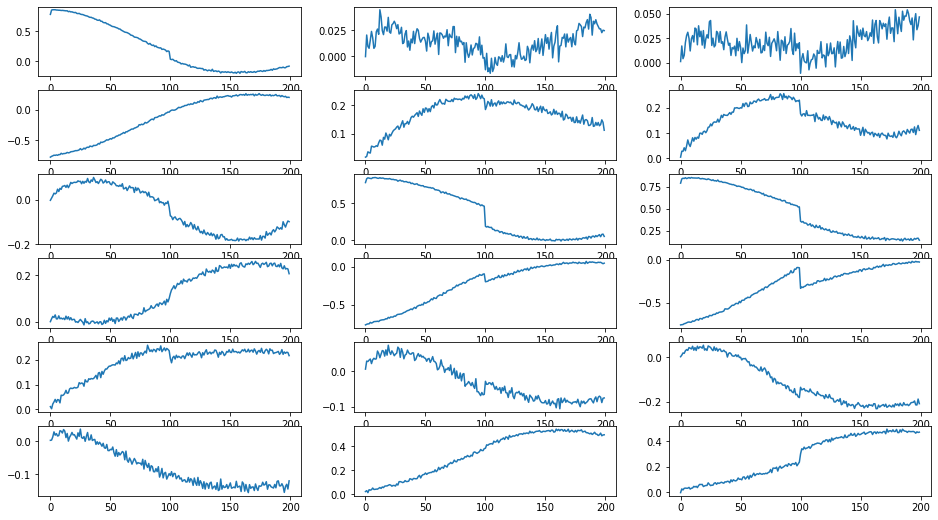

In [93]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 9))
tablet = np.array(table_result)
tablet = (tablet - (20000 - tablet)) / 20000
for i in range(18):
    plt.subplot(6, 3, i + 1)
    plt.plot(np.linspace(0, 199, 200), tablet[i][0:200])

In [97]:
f = open('signal.txt', 'w')
tablet = np.array(table_result)
tablet = (tablet - (20000 - tablet)) / 20000
for k in range(18):
    for j in range(200):
        f.write(str(tablet[k][j]) + "\n")
f.close()

## После гармонической инверсии

### Разбиение на 25

In [156]:
harminv = []
with open('harminv_result_25.txt') as f:
    for line in f:
        harminv.append([float(x) for x in line.split()])
print(harminv)

[[0.01806504410450802, -0.6581338722875536, 0.16075463637373583, -2.3154403556187315], [0.018065044100793216, 0.658133872296663, 0.16075463634794465, 2.3154403555679326], [0.0011348408134476198, -2.9246112170841223, 0.14319280881175245, -1.9396140026827327], [0.0011348408113322297, 2.924611217067023, 0.14319280870348577, 1.9396140010194725], [0.011381075867942762, -1.1398840527224585, 0.050394932724588025, -2.733361169722672], [0.011381075867475972, 1.1398840527251684, 0.050394932723377216, 2.733361169910138], [0.0014887784156776198, 2.874738609030164, 0.026691605743120767, 1.1421863928978382], [0.0014887784122624538, -2.874738609032497, 0.026691605725424682, -1.142186393133019], [0.0025519758813687403, -2.5320823047814836, 0.012418451136003327, -2.9093324882895075], [0.0025519758812119495, 2.5320823047811727, 0.012418451134748387, 2.9093324882665055], [0.0012459599327813784, -2.6881506094234084, 0.01047411551391469, 3.040989157379721], [0.0012459599327201076, 2.6881506094203758, 0.010

C:\Users\pavel\anaconda3\envs\qisk\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-157-8a0a4daea609>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(6, 3, i + 1)
C:\Users\pavel\anaconda3\envs\qisk\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-157-8a0a4daea609>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new insta

C:\Users\pavel\anaconda3\envs\qisk\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-157-8a0a4daea609>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(6, 3, i + 1)
C:\Users\pavel\anaconda3\envs\qisk\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-157-8a0a4daea609>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new insta

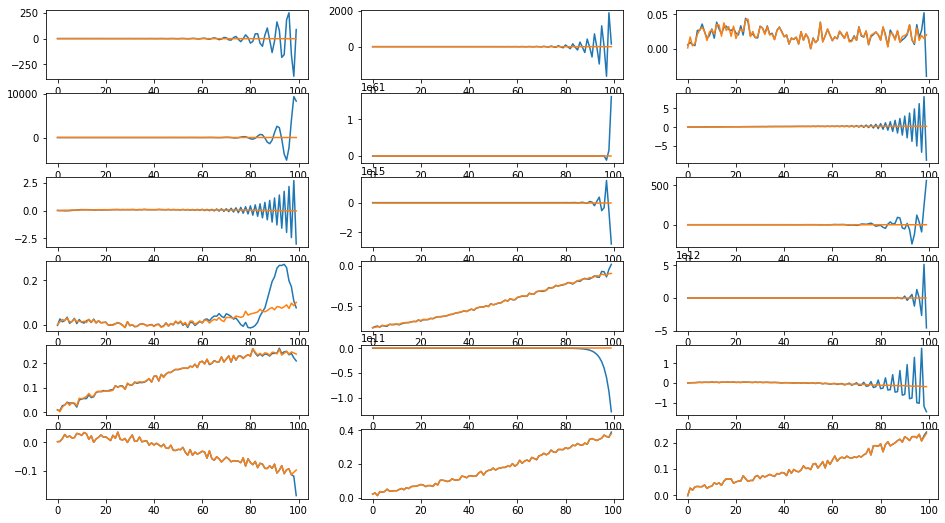

In [157]:
plt.figure(figsize=(16, 9))
tablet = np.array(table_result)
tablet = (tablet - (20000 - tablet)) / 20000
j = 0
time = np.linspace(0,99,100)
for i in range(18):
    amp = []
    dec = []
    freq = []
    phase = []
    while len(harminv[j]) > 1:
        amp.append(harminv[j][0])
        dec.append(harminv[j][2])
        freq.append(harminv[j][1])
        phase.append(harminv[j][3])
        j = j + 1
    j = j + 1
    amp = np.array(amp)
    dec = np.array(dec)
    freq = np.array(freq)
    phase = np.array(phase)
    components = (amp * np.exp(-1j * (freq*time[:,None] - phase) - dec * time[:, None]))
    reconstruction = components.sum(axis = 1)
    plt.subplot(6, 3, i + 1)
    plt.plot(time, reconstruction)
    plt.subplot(6, 3, i + 1)
    plt.plot(time, tablet[i][0:100])    

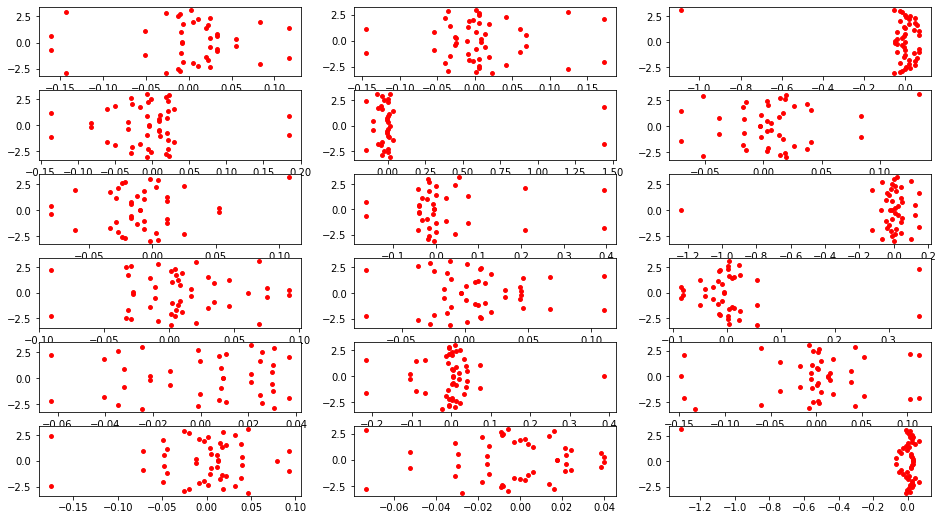

In [158]:
plt.figure(figsize=(16, 9))
j = 0
for i in range(18):
    x = []
    y = []
    while len(harminv[j]) > 1:
        x.append(-harminv[j][2])
        y.append(-harminv[j][1])
        j = j + 1
    j = j + 1
    x = np.array(x)
    y = np.array(y)
    plt.subplot(6, 3, i + 1)
    plt.scatter(x,y,marker = 'o',c = 'r', s = 15)

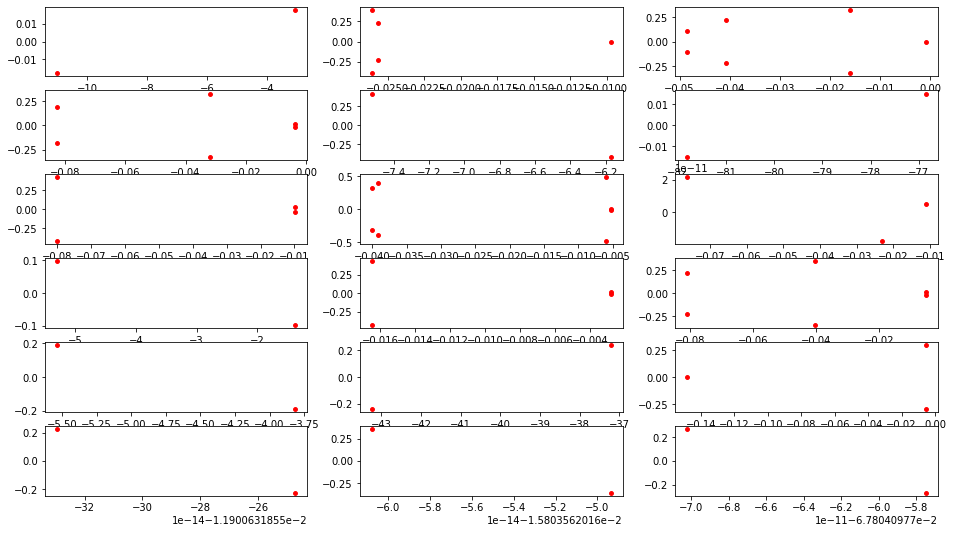

In [159]:
plt.figure(figsize=(16, 9))
j = 0
for i in range(18):
    x = []
    y = []
    while len(harminv[j]) > 1:
        if (-harminv[j][2] > - 0.5 and -harminv[j][2] < 0 and -harminv[j][1] < 0.5 and -harminv[j][1] > -0.5):
            x.append(-harminv[j][2])
            y.append(-harminv[j][1])
        j = j + 1
    j = j + 1
    x = np.array(x)
    y = np.array(y)
    plt.subplot(6, 3, i + 1)
    plt.scatter(x,y,marker = 'o',c = 'r', s = 15)

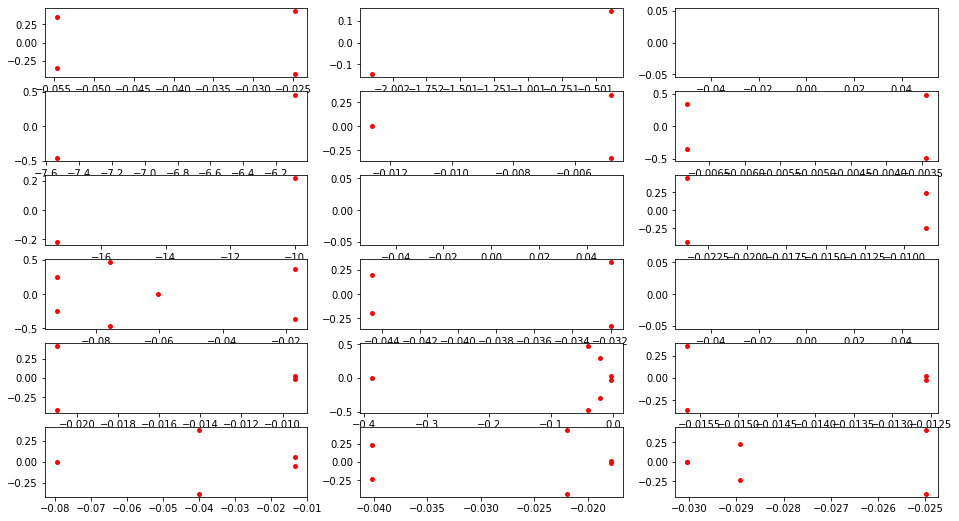

In [160]:
plt.figure(figsize=(16, 9))
j = 0
for i in range(18):
    x = []
    y = []
    while len(harminv[j]) > 1:
        if (harminv[j][2] > - 0.5 and harminv[j][2] < 0 and harminv[j][1] < 0.5 and harminv[j][1] > -0.5):
            x.append(harminv[j][2])
            y.append(harminv[j][1])
        j = j + 1
    j = j + 1
    x = np.array(x)
    y = np.array(y)
    plt.subplot(6, 3, i + 1)
    plt.scatter(x,y,marker = 'o',c = 'r', s = 15)

### Разбиение на 50

In [161]:
harminv = []
with open('harminv_result_50.txt') as f:
    for line in f:
        harminv.append([float(x) for x in line.split()])
print(harminv)

[[0.01806504410450802, -0.6581338722875536, 0.16075463637373583, -2.3154403556187315], [0.018065044100793216, 0.658133872296663, 0.16075463634794465, 2.3154403555679326], [0.0011348408134476198, -2.9246112170841223, 0.14319280881175245, -1.9396140026827327], [0.0011348408113322297, 2.924611217067023, 0.14319280870348577, 1.9396140010194725], [0.011381075867942762, -1.1398840527224585, 0.050394932724588025, -2.733361169722672], [0.011381075867475972, 1.1398840527251684, 0.050394932723377216, 2.733361169910138], [0.0014887784156776198, 2.874738609030164, 0.026691605743120767, 1.1421863928978382], [0.0014887784122624538, -2.874738609032497, 0.026691605725424682, -1.142186393133019], [0.0025519758813687403, -2.5320823047814836, 0.012418451136003327, -2.9093324882895075], [0.0025519758812119495, 2.5320823047811727, 0.012418451134748387, 2.9093324882665055], [0.0012459599327813784, -2.6881506094234084, 0.01047411551391469, 3.040989157379721], [0.0012459599327201076, 2.6881506094203758, 0.010

C:\Users\pavel\anaconda3\envs\qisk\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-162-8a0a4daea609>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(6, 3, i + 1)
C:\Users\pavel\anaconda3\envs\qisk\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-162-8a0a4daea609>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new insta

C:\Users\pavel\anaconda3\envs\qisk\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-162-8a0a4daea609>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(6, 3, i + 1)
C:\Users\pavel\anaconda3\envs\qisk\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-162-8a0a4daea609>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new insta

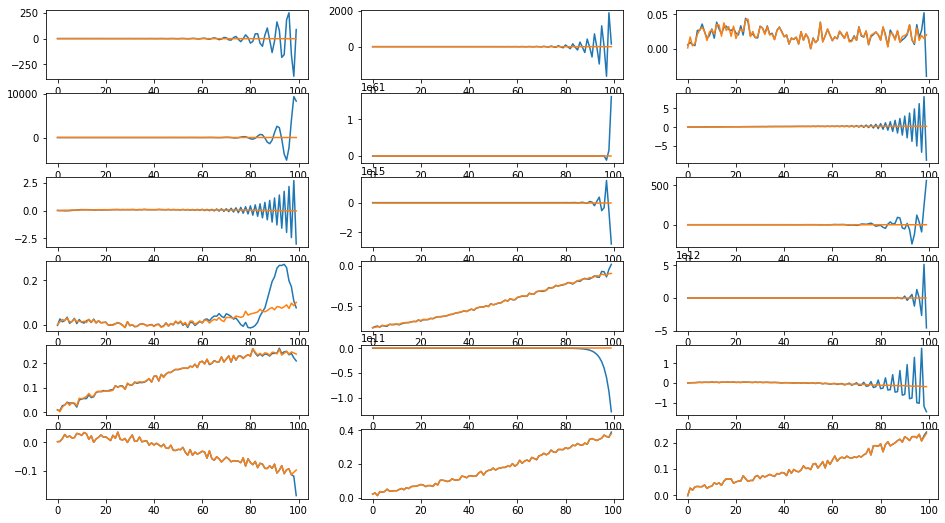

In [162]:
plt.figure(figsize=(16, 9))
tablet = np.array(table_result)
tablet = (tablet - (20000 - tablet)) / 20000
j = 0
time = np.linspace(0,99,100)
for i in range(18):
    amp = []
    dec = []
    freq = []
    phase = []
    while len(harminv[j]) > 1:
        amp.append(harminv[j][0])
        dec.append(harminv[j][2])
        freq.append(harminv[j][1])
        phase.append(harminv[j][3])
        j = j + 1
    j = j + 1
    amp = np.array(amp)
    dec = np.array(dec)
    freq = np.array(freq)
    phase = np.array(phase)
    components = (amp * np.exp(-1j * (freq*time[:,None] - phase) - dec * time[:, None]))
    reconstruction = components.sum(axis = 1)
    plt.subplot(6, 3, i + 1)
    plt.plot(time, reconstruction)
    plt.subplot(6, 3, i + 1)
    plt.plot(time, tablet[i][0:100])    

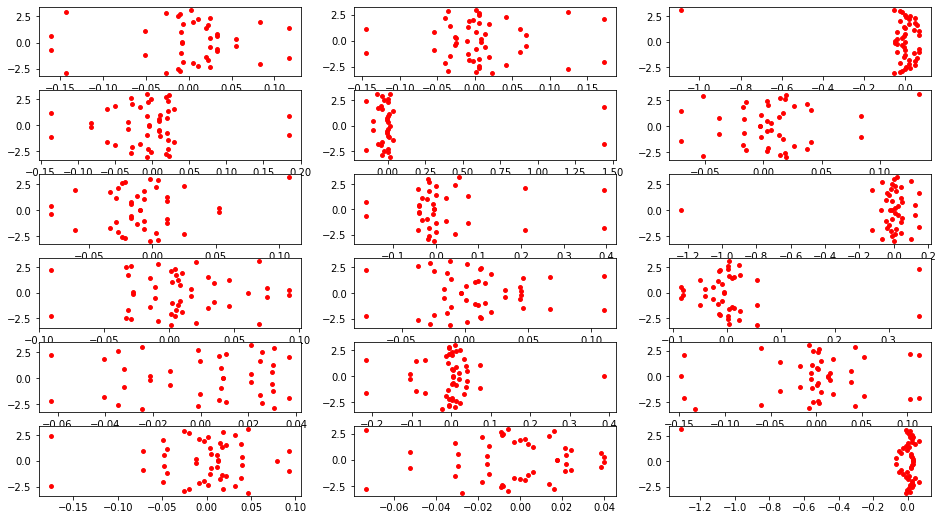

In [163]:
plt.figure(figsize=(16, 9))
j = 0
for i in range(18):
    x = []
    y = []
    while len(harminv[j]) > 1:
        x.append(-harminv[j][2])
        y.append(-harminv[j][1])
        j = j + 1
    j = j + 1
    x = np.array(x)
    y = np.array(y)
    plt.subplot(6, 3, i + 1)
    plt.scatter(x,y,marker = 'o',c = 'r', s = 15)

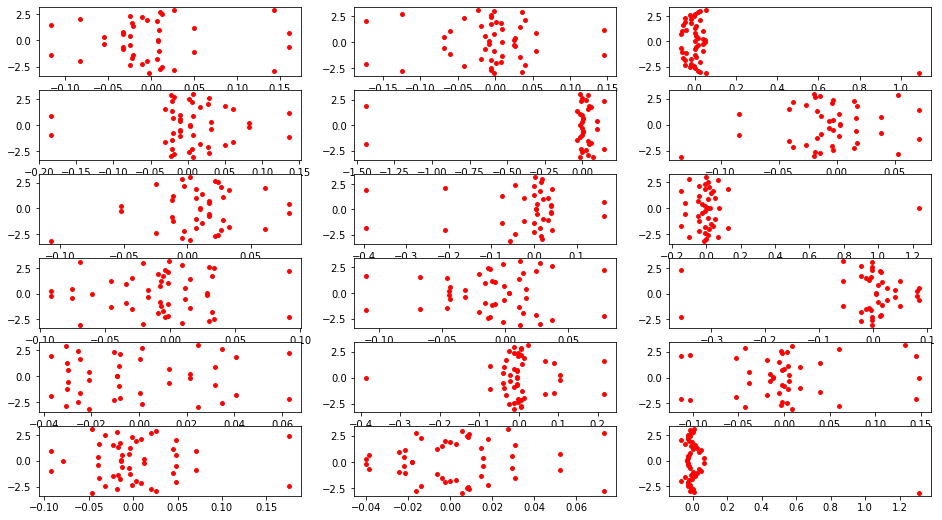

In [164]:
plt.figure(figsize=(16, 9))
j = 0
for i in range(18):
    x = []
    y = []
    while len(harminv[j]) > 1:
        x.append(harminv[j][2])
        y.append(harminv[j][1])
        j = j + 1
    j = j + 1
    x = np.array(x)
    y = np.array(y)
    plt.subplot(6, 3, i + 1)
    plt.scatter(x,y,marker = 'o',c = 'r', s = 15)

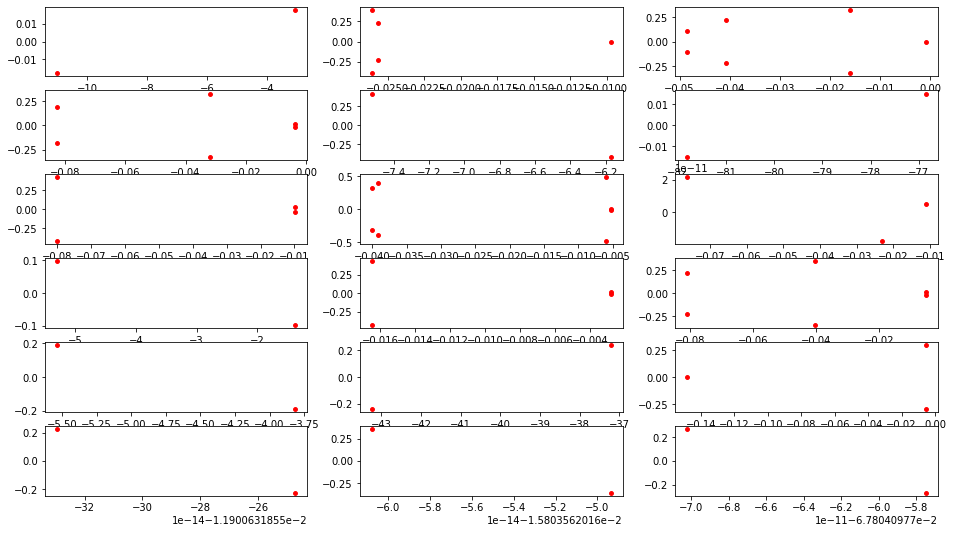

In [165]:
plt.figure(figsize=(16, 9))
j = 0
for i in range(18):
    x = []
    y = []
    while len(harminv[j]) > 1:
        if (-harminv[j][2] > - 0.5 and -harminv[j][2] < 0 and -harminv[j][1] < 0.5 and -harminv[j][1] > -0.5):
            x.append(-harminv[j][2])
            y.append(-harminv[j][1])
        j = j + 1
    j = j + 1
    x = np.array(x)
    y = np.array(y)
    plt.subplot(6, 3, i + 1)
    plt.scatter(x,y,marker = 'o',c = 'r', s = 15)

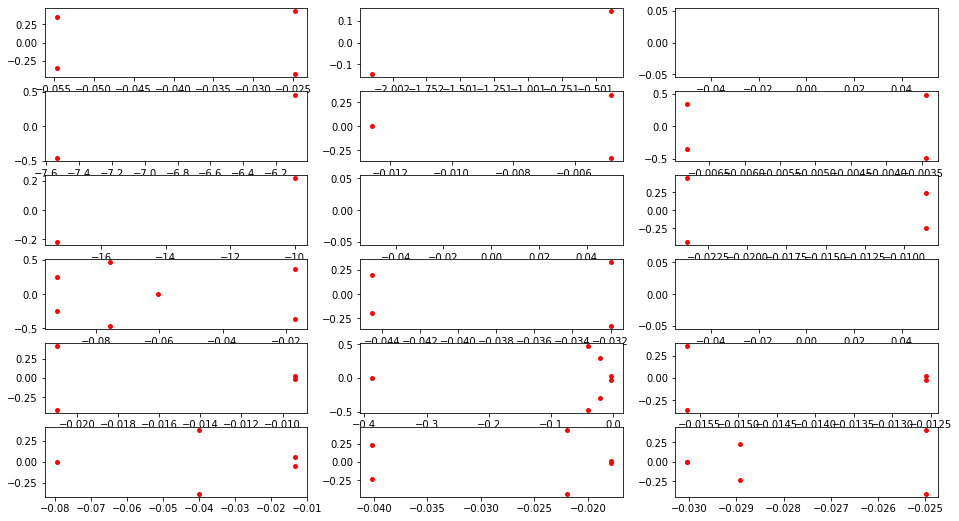

In [166]:
plt.figure(figsize=(16, 9))
j = 0
for i in range(18):
    x = []
    y = []
    while len(harminv[j]) > 1:
        if (harminv[j][2] > - 0.5 and harminv[j][2] < 0 and harminv[j][1] < 0.5 and harminv[j][1] > -0.5):
            x.append(harminv[j][2])
            y.append(harminv[j][1])
        j = j + 1
    j = j + 1
    x = np.array(x)
    y = np.array(y)
    plt.subplot(6, 3, i + 1)
    plt.scatter(x,y,marker = 'o',c = 'r', s = 15)

### Разбиение на 75

In [167]:
harminv = []
with open('harminv_result_75.txt') as f:
    for line in f:
        harminv.append([float(x) for x in line.split()])
print(harminv)

[[0.01835677382023242, 2.084145648947213, 0.35165317319606315, 3.1198964897558437], [0.01835677382006461, -2.084145648957092, 0.35165317318912903, -3.1198964897690264], [0.04393811355771973, 2.803273525166918, 0.07280475460049006, 2.4548495638039958], [0.043938113555383136, -2.803273525167012, 0.07280475459980013, -2.454849563804692], [0.0041590538271215755, -1.9978108956514489, 0.03530949972794592, 1.6867166444502617], [0.004159053826261133, 1.9978108956487084, 0.03530949972455972, -1.6867166445226798], [0.00021975136200415193, 2.0779009076054593, 0.01750530927453486, 2.8722032248240867], [0.00021975136202520015, -2.0779009075967725, 0.017505309273114212, -2.872203224761058], [0.0016168744174332903, 1.0319907167485842, 0.014596452177140628, -1.132855915272869], [0.0016168744174123787, -1.0319907167478253, 0.01459645217684322, 1.1328559153196458], [0.0018583784434166935, 0.8210220345162816, 0.01092236589164108, 2.766778832059866], [0.0018583784433962975, -0.8210220345161261, 0.01092236

C:\Users\pavel\anaconda3\envs\qisk\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-168-8a0a4daea609>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(6, 3, i + 1)
C:\Users\pavel\anaconda3\envs\qisk\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-168-8a0a4daea609>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new insta

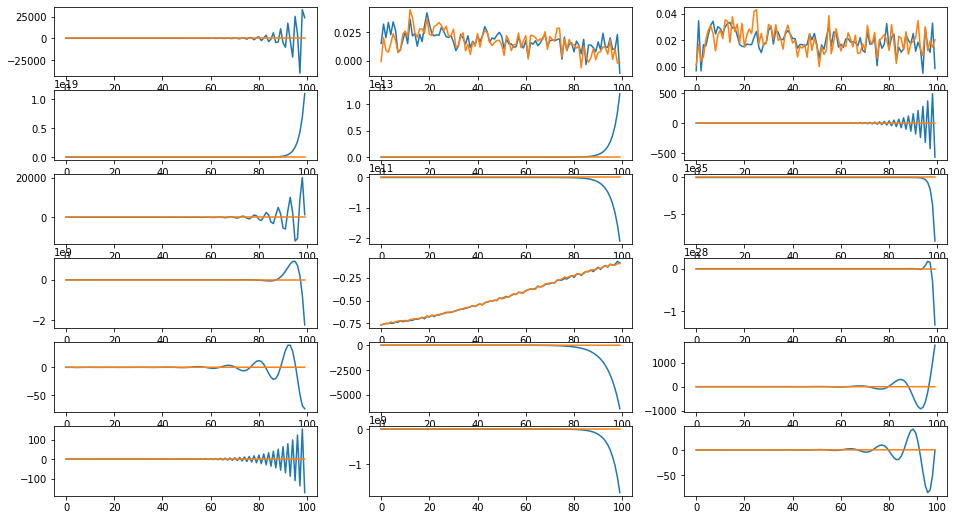

In [168]:
plt.figure(figsize=(16, 9))
tablet = np.array(table_result)
tablet = (tablet - (20000 - tablet)) / 20000
j = 0
time = np.linspace(0,99,100)
for i in range(18):
    amp = []
    dec = []
    freq = []
    phase = []
    while len(harminv[j]) > 1:
        amp.append(harminv[j][0])
        dec.append(harminv[j][2])
        freq.append(harminv[j][1])
        phase.append(harminv[j][3])
        j = j + 1
    j = j + 1
    amp = np.array(amp)
    dec = np.array(dec)
    freq = np.array(freq)
    phase = np.array(phase)
    components = (amp * np.exp(-1j * (freq*time[:,None] - phase) - dec * time[:, None]))
    reconstruction = components.sum(axis = 1)
    plt.subplot(6, 3, i + 1)
    plt.plot(time, reconstruction)
    plt.subplot(6, 3, i + 1)
    plt.plot(time, tablet[i][0:100])    

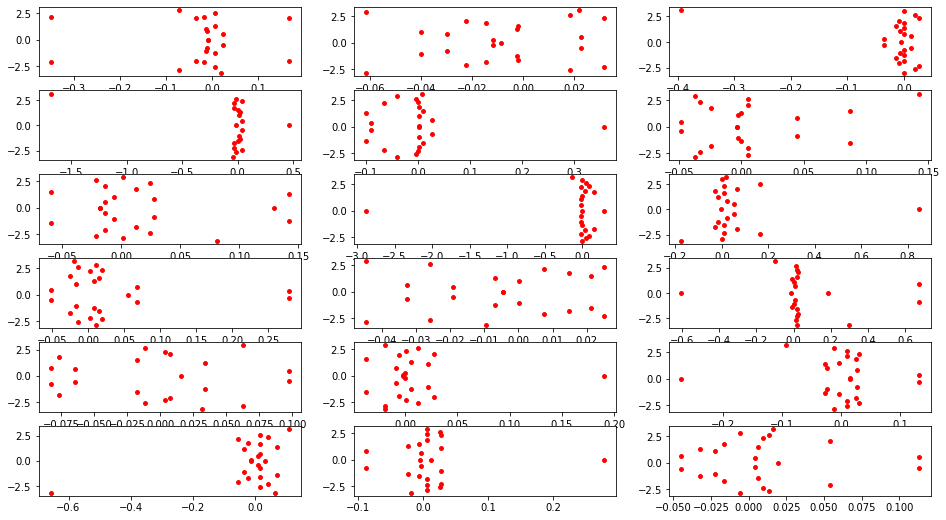

In [169]:
plt.figure(figsize=(16, 9))
j = 0
for i in range(18):
    x = []
    y = []
    while len(harminv[j]) > 1:
        x.append(-harminv[j][2])
        y.append(-harminv[j][1])
        j = j + 1
    j = j + 1
    x = np.array(x)
    y = np.array(y)
    plt.subplot(6, 3, i + 1)
    plt.scatter(x,y,marker = 'o',c = 'r', s = 15)

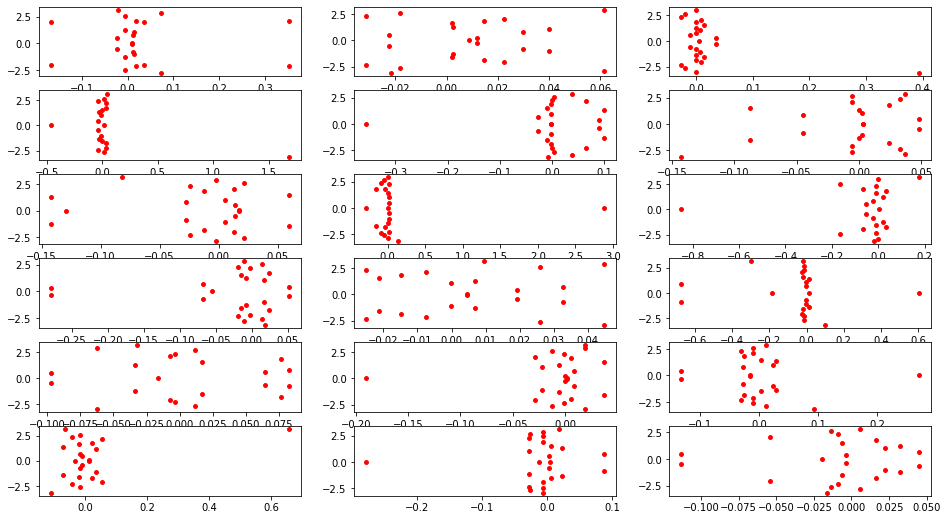

In [170]:
plt.figure(figsize=(16, 9))
j = 0
for i in range(18):
    x = []
    y = []
    while len(harminv[j]) > 1:
        x.append(harminv[j][2])
        y.append(harminv[j][1])
        j = j + 1
    j = j + 1
    x = np.array(x)
    y = np.array(y)
    plt.subplot(6, 3, i + 1)
    plt.scatter(x,y,marker = 'o',c = 'r', s = 15)

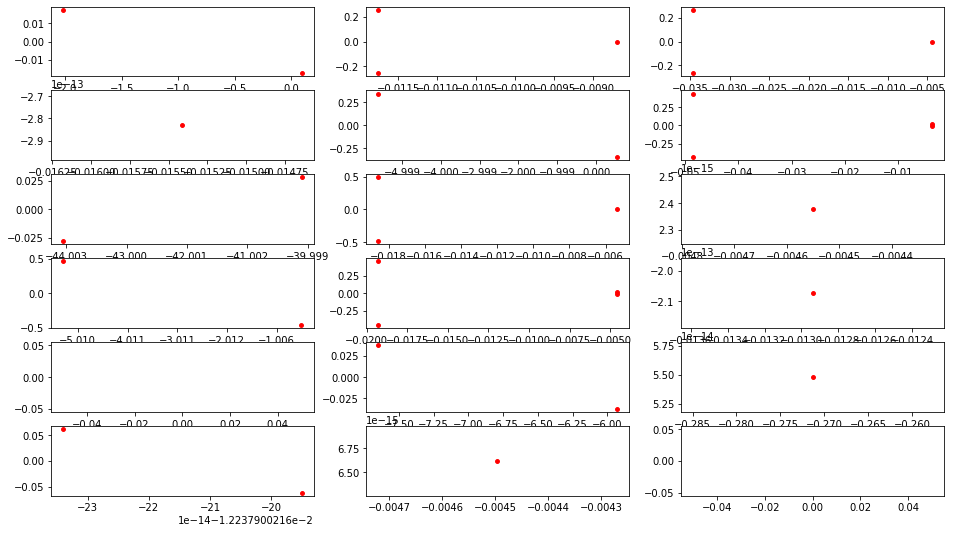

In [171]:
plt.figure(figsize=(16, 9))
j = 0
for i in range(18):
    x = []
    y = []
    while len(harminv[j]) > 1:
        if (-harminv[j][2] > - 0.5 and -harminv[j][2] < 0 and -harminv[j][1] < 0.5 and -harminv[j][1] > -0.5):
            x.append(-harminv[j][2])
            y.append(-harminv[j][1])
        j = j + 1
    j = j + 1
    x = np.array(x)
    y = np.array(y)
    plt.subplot(6, 3, i + 1)
    plt.scatter(x,y,marker = 'o',c = 'r', s = 15)

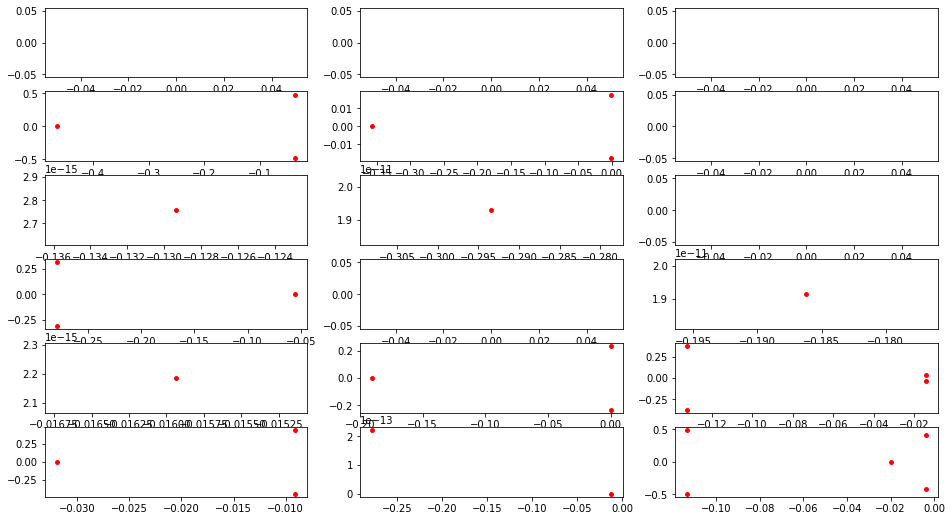

In [172]:
plt.figure(figsize=(16, 9))
j = 0
for i in range(18):
    x = []
    y = []
    while len(harminv[j]) > 1:
        if (harminv[j][2] > - 0.5 and harminv[j][2] < 0 and harminv[j][1] < 0.5 and harminv[j][1] > -0.5):
            x.append(harminv[j][2])
            y.append(harminv[j][1])
        j = j + 1
    j = j + 1
    x = np.array(x)
    y = np.array(y)
    plt.subplot(6, 3, i + 1)
    plt.scatter(x,y,marker = 'o',c = 'r', s = 15)

### Разбиение на 90

In [185]:
harminv = []
with open('harminv_result_90.txt') as f:
    for line in f:
        harminv.append([float(x) for x in line.split()])
print(harminv)

[[0.4939600211411456, 0.01758837102189974, 0.008885642618050854, 0.5452538870380672], [0.49396002112588305, -0.01758837102238151, 0.008885642617895267, -0.5452538870539186], [0.0002505945209285813, 2.0078222643713755, -0.003758002116912717, -0.8659618989718522], [0.000250594519174664, -2.007822264553051, -0.0037580021641529233, 0.8659618929496025], [8.295017544277291e-05, 2.3849959015361715, -0.0421282211724839, 1.5733075436137143], [8.295017476690441e-05, -2.38499590072641, -0.04212822160984289, -1.573307514456622], [5.3872756976986934e-05, 3.1415926535686345, -0.06369493140270342, -3.4276840900490477e-10], [1.3570195814215026e-05, -1.5272292595057972, -0.07407465973581714, -0.07756695537919632], [1.3570195802280926e-05, 1.5272292594135228, -0.07407465978202273, 0.07756695191290398], [], [0.027993034897874088, -5.702262972982565e-14, 0.009017356361398506, -1.9974432233678994e-12], [0.003168768916323727, 0.2283719512198325, 0.008395571003844379, -1.7534229139399842], [0.003168768916223

C:\Users\pavel\anaconda3\envs\qisk\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-186-8a0a4daea609>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(6, 3, i + 1)
C:\Users\pavel\anaconda3\envs\qisk\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-186-8a0a4daea609>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new insta

C:\Users\pavel\anaconda3\envs\qisk\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-186-8a0a4daea609>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(6, 3, i + 1)


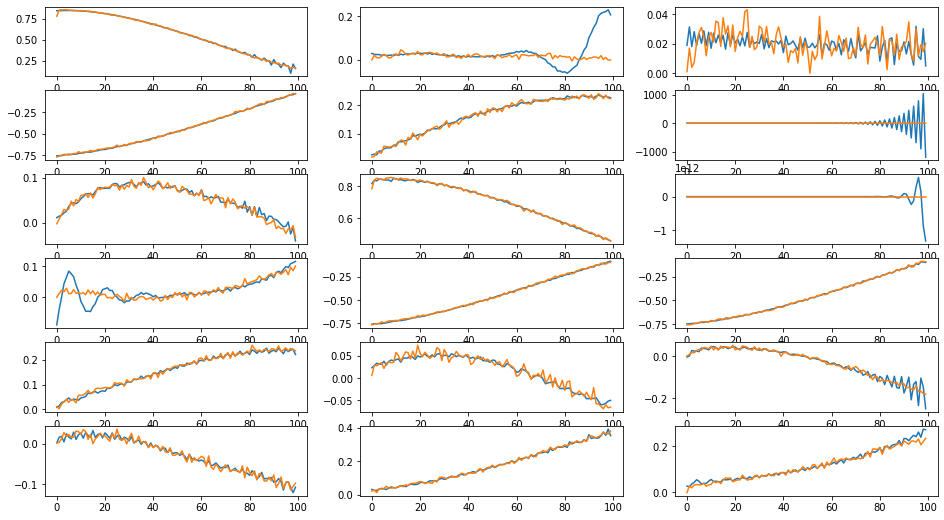

In [186]:
plt.figure(figsize=(16, 9))
tablet = np.array(table_result)
tablet = (tablet - (20000 - tablet)) / 20000
j = 0
time = np.linspace(0,99,100)
for i in range(18):
    amp = []
    dec = []
    freq = []
    phase = []
    while len(harminv[j]) > 1:
        amp.append(harminv[j][0])
        dec.append(harminv[j][2])
        freq.append(harminv[j][1])
        phase.append(harminv[j][3])
        j = j + 1
    j = j + 1
    amp = np.array(amp)
    dec = np.array(dec)
    freq = np.array(freq)
    phase = np.array(phase)
    components = (amp * np.exp(-1j * (freq*time[:,None] - phase) - dec * time[:, None]))
    reconstruction = components.sum(axis = 1)
    plt.subplot(6, 3, i + 1)
    plt.plot(time, reconstruction)
    plt.subplot(6, 3, i + 1)
    plt.plot(time, tablet[i][0:100])    

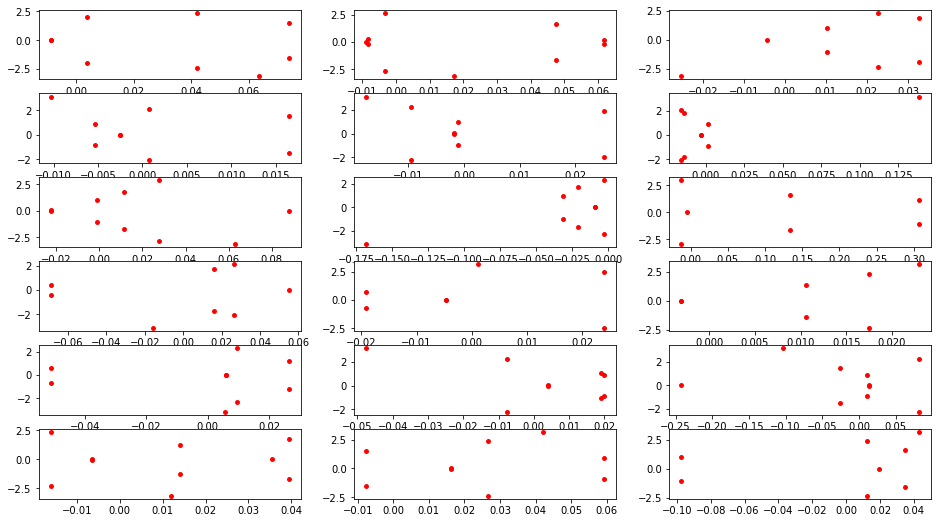

In [187]:
plt.figure(figsize=(16, 9))
j = 0
for i in range(18):
    x = []
    y = []
    while len(harminv[j]) > 1:
        x.append(-harminv[j][2])
        y.append(-harminv[j][1])
        j = j + 1
    j = j + 1
    x = np.array(x)
    y = np.array(y)
    plt.subplot(6, 3, i + 1)
    plt.scatter(x,y,marker = 'o',c = 'r', s = 15)

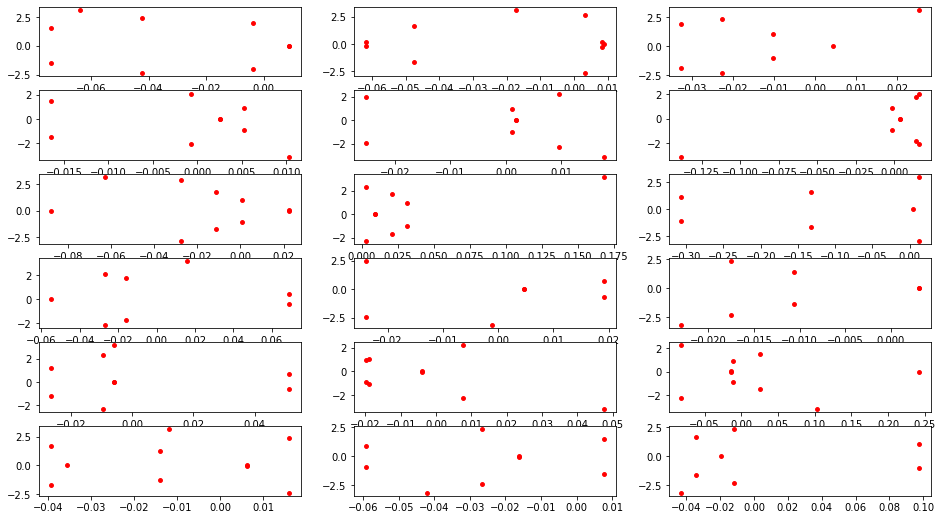

In [188]:
plt.figure(figsize=(16, 9))
j = 0
for i in range(18):
    x = []
    y = []
    while len(harminv[j]) > 1:
        x.append(harminv[j][2])
        y.append(harminv[j][1])
        j = j + 1
    j = j + 1
    x = np.array(x)
    y = np.array(y)
    plt.subplot(6, 3, i + 1)
    plt.scatter(x,y,marker = 'o',c = 'r', s = 15)

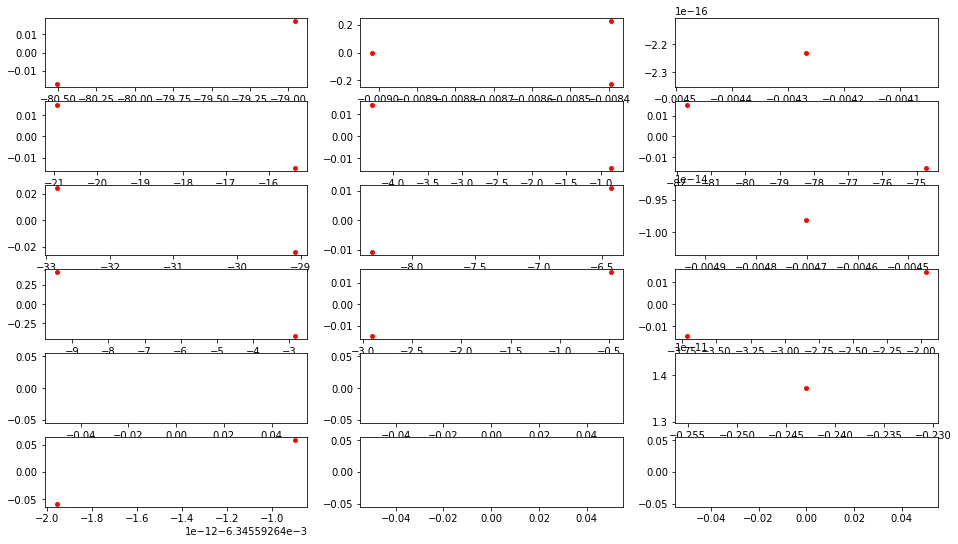

In [189]:
plt.figure(figsize=(16, 9))
j = 0
for i in range(18):
    x = []
    y = []
    while len(harminv[j]) > 1:
        if (-harminv[j][2] > - 0.5 and -harminv[j][2] < 0 and -harminv[j][1] < 0.5 and -harminv[j][1] > -0.5):
            x.append(-harminv[j][2])
            y.append(-harminv[j][1])
        j = j + 1
    j = j + 1
    x = np.array(x)
    y = np.array(y)
    plt.subplot(6, 3, i + 1)
    plt.scatter(x,y,marker = 'o',c = 'r', s = 15)

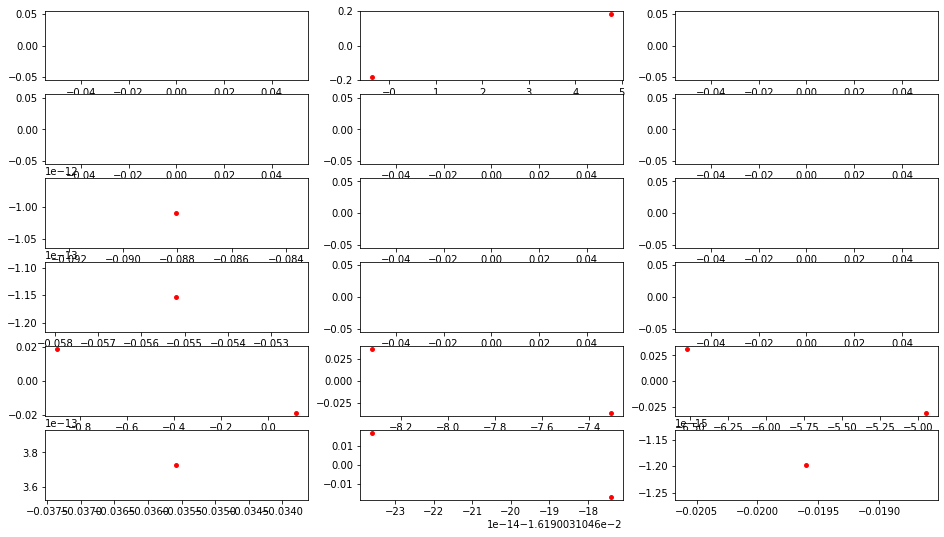

In [190]:
plt.figure(figsize=(16, 9))
j = 0
for i in range(18):
    x = []
    y = []
    while len(harminv[j]) > 1:
        if (harminv[j][2] > - 0.5 and harminv[j][2] < 0 and harminv[j][1] < 0.5 and harminv[j][1] > -0.5):
            x.append(harminv[j][2])
            y.append(harminv[j][1])
        j = j + 1
    j = j + 1
    x = np.array(x)
    y = np.array(y)
    plt.subplot(6, 3, i + 1)
    plt.scatter(x,y,marker = 'o',c = 'r', s = 15)

### Разбиение на 100

In [191]:
harminv = []
with open('harminv_result_100.txt') as f:
    for line in f:
        harminv.append([float(x) for x in line.split()])
print(harminv)

[[1.0898967960128851, 5.554649264706036e-16, 0.01326721025241659, 2.5014340727807877e-14], [], [0.02688852553307861, 2.2368984667332698e-15, 0.00842508520666661, 1.0631252152468085e-13], [], [0.024142484865748787, 3.529394159926719e-17, 0.0042936079491006, 1.5078670122918176e-15], [], [0.9800686056597466, 2.674700184026517e-18, 0.01615933126458107, -3.141592653589793], [], [0.1341317594672375, -0.01463895694714088, 0.001614507418781537, -1.479685052940642], [0.13413175946723396, 0.014638956947136232, 0.0016145074187747539, 1.4796850529403334], [], [0.10029794093820121, -3.0239660672106892e-15, -0.012107402352262623, -1.5380589152939775e-13], [], [0.10501536831369597, 3.454754015599212e-17, 0.010183814414172182, 1.574054455647975e-15], [], [0.949162622797081, 9.460253882795714e-17, 0.005759157542150979, 4.429366104791794e-15], [], [0.9332848496754896, -1.7487209494743174e-17, 0.004765656866601003, -8.226491929215174e-16], [], [0.0032834812889746554, -3.1415926526436304, 0.01687623227471

C:\Users\pavel\anaconda3\envs\qisk\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-192-8a0a4daea609>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(6, 3, i + 1)
C:\Users\pavel\anaconda3\envs\qisk\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-192-8a0a4daea609>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new insta

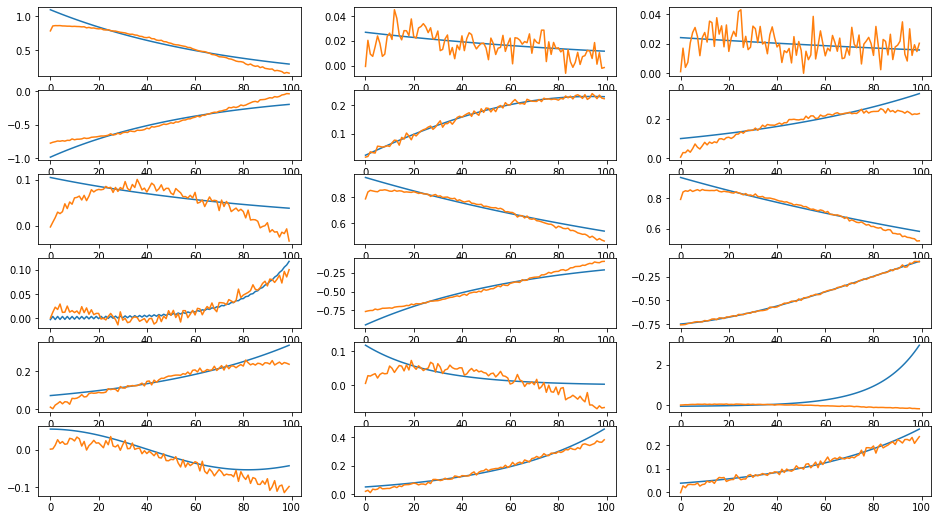

In [192]:
plt.figure(figsize=(16, 9))
tablet = np.array(table_result)
tablet = (tablet - (20000 - tablet)) / 20000
j = 0
time = np.linspace(0,99,100)
for i in range(18):
    amp = []
    dec = []
    freq = []
    phase = []
    while len(harminv[j]) > 1:
        amp.append(harminv[j][0])
        dec.append(harminv[j][2])
        freq.append(harminv[j][1])
        phase.append(harminv[j][3])
        j = j + 1
    j = j + 1
    amp = np.array(amp)
    dec = np.array(dec)
    freq = np.array(freq)
    phase = np.array(phase)
    components = (amp * np.exp(-1j * (freq*time[:,None] - phase) - dec * time[:, None]))
    reconstruction = components.sum(axis = 1)
    plt.subplot(6, 3, i + 1)
    plt.plot(time, reconstruction)
    plt.subplot(6, 3, i + 1)
    plt.plot(time, tablet[i][0:100])    

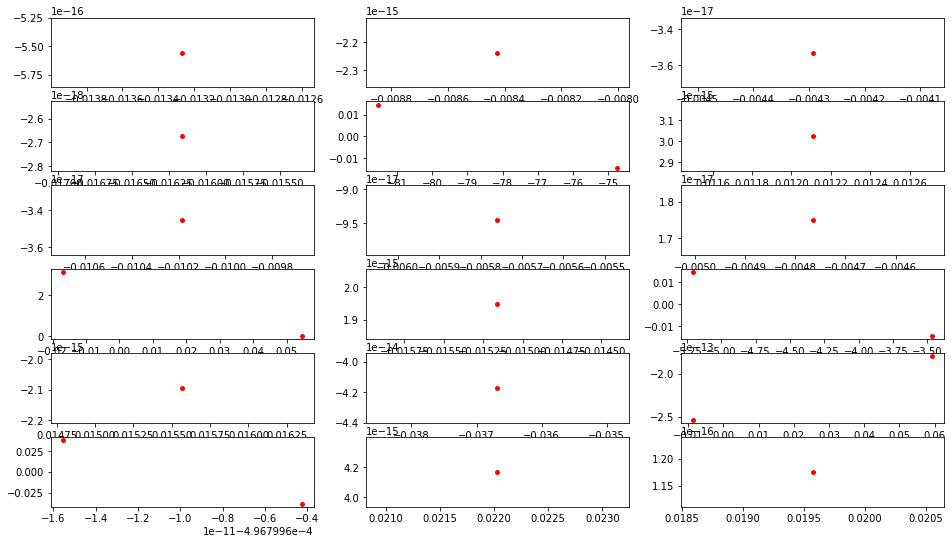

In [193]:
plt.figure(figsize=(16, 9))
j = 0
for i in range(18):
    x = []
    y = []
    while len(harminv[j]) > 1:
        x.append(-harminv[j][2])
        y.append(-harminv[j][1])
        j = j + 1
    j = j + 1
    x = np.array(x)
    y = np.array(y)
    plt.subplot(6, 3, i + 1)
    plt.scatter(x,y,marker = 'o',c = 'r', s = 15)

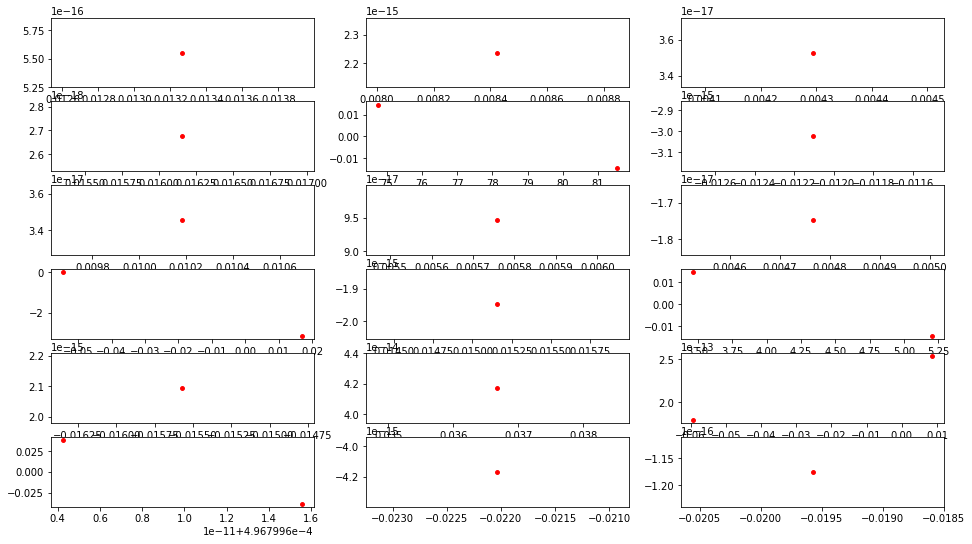

In [194]:
plt.figure(figsize=(16, 9))
j = 0
for i in range(18):
    x = []
    y = []
    while len(harminv[j]) > 1:
        x.append(harminv[j][2])
        y.append(harminv[j][1])
        j = j + 1
    j = j + 1
    x = np.array(x)
    y = np.array(y)
    plt.subplot(6, 3, i + 1)
    plt.scatter(x,y,marker = 'o',c = 'r', s = 15)

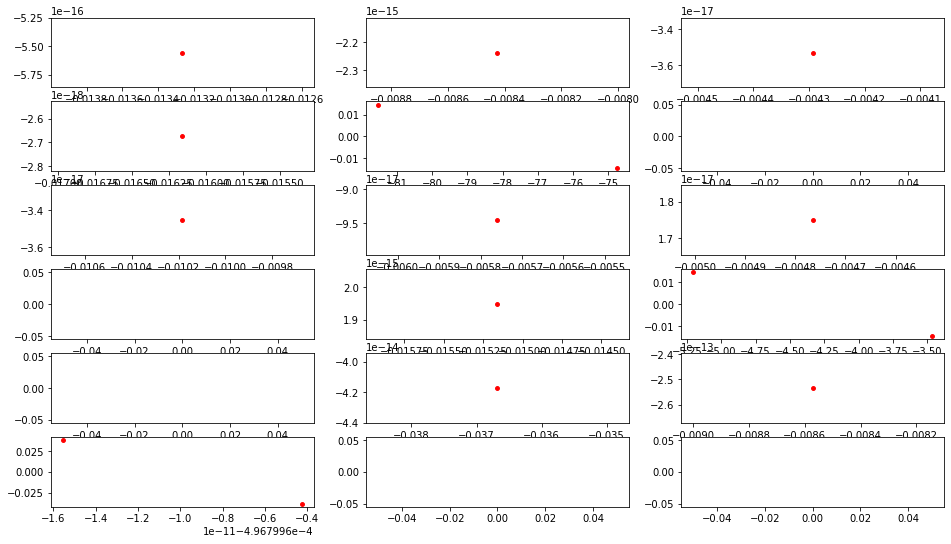

In [195]:
plt.figure(figsize=(16, 9))
j = 0
for i in range(18):
    x = []
    y = []
    while len(harminv[j]) > 1:
        if (-harminv[j][2] > - 0.5 and -harminv[j][2] < 0 and -harminv[j][1] < 0.5 and -harminv[j][1] > -0.5):
            x.append(-harminv[j][2])
            y.append(-harminv[j][1])
        j = j + 1
    j = j + 1
    x = np.array(x)
    y = np.array(y)
    plt.subplot(6, 3, i + 1)
    plt.scatter(x,y,marker = 'o',c = 'r', s = 15)

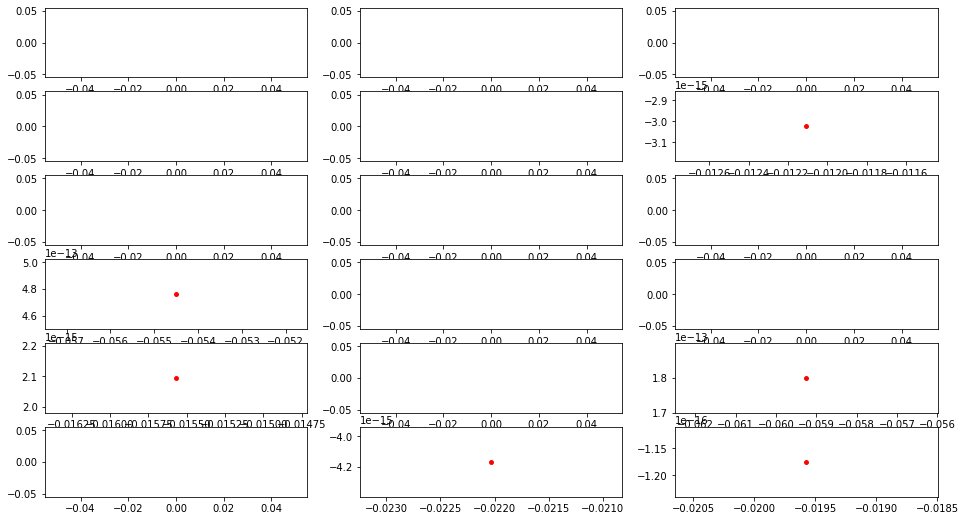

In [196]:
plt.figure(figsize=(16, 9))
j = 0
for i in range(18):
    x = []
    y = []
    while len(harminv[j]) > 1:
        if (harminv[j][2] > - 0.5 and harminv[j][2] < 0 and harminv[j][1] < 0.5 and harminv[j][1] > -0.5):
            x.append(harminv[j][2])
            y.append(harminv[j][1])
        j = j + 1
    j = j + 1
    x = np.array(x)
    y = np.array(y)
    plt.subplot(6, 3, i + 1)
    plt.scatter(x,y,marker = 'o',c = 'r', s = 15)